# In Class Notebook, Week 02

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2023/blob/master/week02/inClass_week02.ipynb

Or paste this URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [2]:
print('hi')

hi


In [4]:
2+3 # to run this cell, I can also do "SHIFT + RETURN"

5

I can write stuff like normal.

# I can make a big header
## I can make a slightly smaller header
### Even smaller
#### I think this is the dingiest one we can get

I can also make an ordered list:
1. thing number 1
1. thing number 2
1. thing number 3

I can also make unordered lists:
* this is an item
* this is another item
* a final item
  * this is a small thing I want to say about the last item
  
### Things we won't really use too much but are still super cool
- [X] task 1
- [ ] task 2

$\frac{3}{5}$

In [26]:
import PIL.Image as Image
#from PIL import Image

This is how to read in the image if you have downloaded it locally:

In [6]:
im = Image.open('/Users/jnaiman/Downloads/stitch_reworked.png')
# C://USER NAME/Downloads

If you are on PL (or just don't want to bother downloading "by hand"):

In [23]:
!wget https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/stitch_reworked.png

--2023-08-31 15:40:20--  https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/stitch_reworked.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9459 (9.2K) [image/png]
Saving to: ‘stitch_reworked.png’

stitch_reworked.png 100%[===================>]   9.24K  --.-KB/s    in 0s      

2023-08-31 15:40:20 (49.8 MB/s) - ‘stitch_reworked.png’ saved [9459/9459]



In [27]:
im = Image.open('stitch_reworked.png')

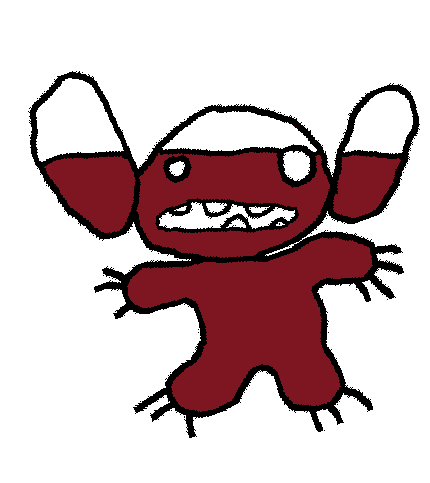

In [28]:
im

In [29]:
type(im)

PIL.PngImagePlugin.PngImageFile

In [30]:
import numpy as np

In [31]:
im_data = np.array(im)

In [32]:
im_data.shape # (# of rows, # of colunmns, # of color channels = RGBA)

(483, 430, 4)

In [15]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [17]:
im_data.reshape(-1, im_data.shape[2]).shape

(207690, 4)

In [18]:
483*430

207690

In [19]:
im_data.reshape(-1, im_data.shape[2]) # I get this 60% --> that is fine!

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [20]:
np.unique(im_data.reshape(-1,im_data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [21]:
# quick plot with this data
import matplotlib.pyplot as plt

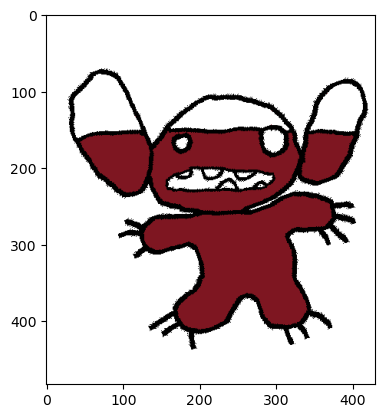

In [22]:
plt.imshow(im_data)

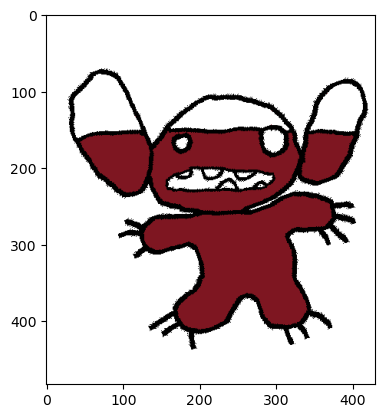

In [33]:
plt.imshow(im_data)
plt.show()

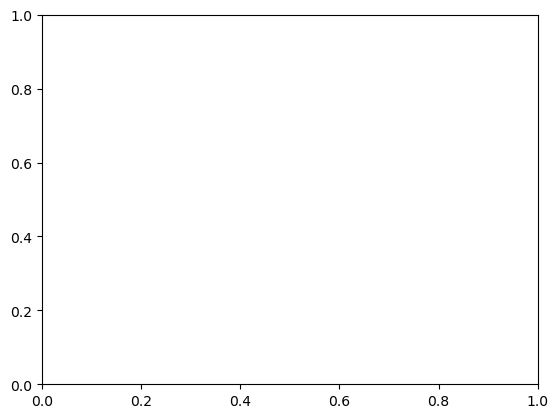

In [34]:
fig, ax = plt.subplots()

In [36]:
ax

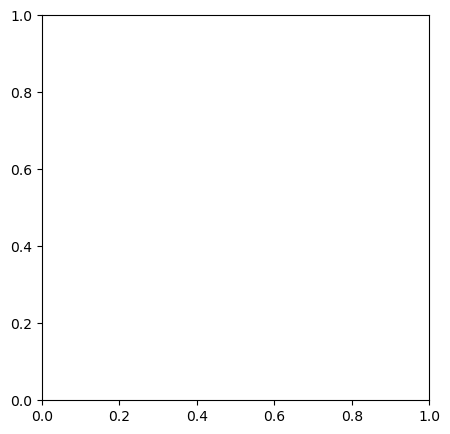

In [38]:
fig, ax = plt.subplots(figsize=(5,5))

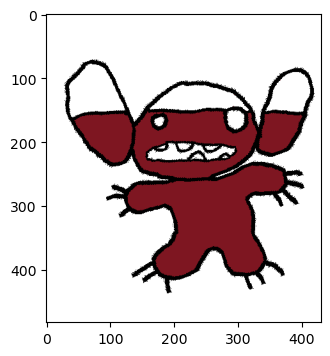

In [41]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(im_data)
plt.show()

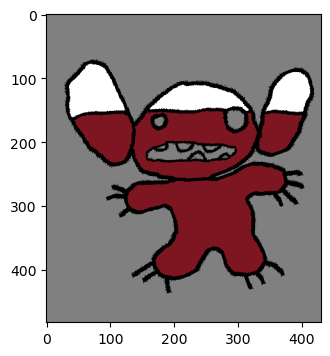

In [42]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(im_data)
ax.set_facecolor('gray')
plt.show()

In [43]:
# any part of the image that has 255 in the Red color channel (the first in RGBA)
# is going to be a "good" part of Stitch

reds_good_mask = im_data[:,:,0] == 255
# [: = all rows, : = all columns, 0 = Red (first) channel]

In [44]:
reds_good_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [45]:
im_data[reds_good_mask]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [46]:
reds_good_mask = im_data[:,:,0] == 255 # where Red = 255
greens_good_mask = im_data[:,:,1] == 255 # where Green = 255
blues_good_mask = im_data[:,:,2] == 255 # where Blue = 255
alphas_good_mask = im_data[:,:,3] == 255 # alpha/opacity = 255

pixel_mask_good = reds_good_mask & greens_good_mask & blues_good_mask & alphas_good_mask

In [47]:
good_pixels = im_data[pixel_mask_good]

In [48]:
ngood = len(good_pixels)
ngood

11929

In [49]:
img_data_good = im_data.copy()
img_data_good[~pixel_mask_good] = 0 # if it is not a "good" pixel set to black and 
#                                     transparent

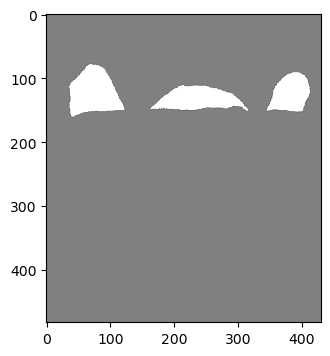

In [50]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_facecolor('gray')
ax.imshow(img_data_good)
plt.show()

In [51]:
np.unique(im_data.reshape(-1,im_data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [52]:
reds_bad_mask = im_data[:,:,0] == 126 # where Red = 126
greens_bad_mask = im_data[:,:,1] == 22 # where Green = 22
blues_bad_mask = im_data[:,:,2] == 33 # where Blue = 33
alphas_bad_mask = im_data[:,:,3] == 255 # alpha/opacity = 255

pixel_mask_bad = reds_bad_mask & greens_bad_mask & blues_bad_mask & alphas_bad_mask

In [84]:
trying_mask = im_data[:, :] == np.repeat([126, 22, 33, 255],len(im_data),a)
len(im_data[trying_mask])

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


0

In [79]:
np.equal?

In [53]:
nbad = len(im_data[pixel_mask_bad])
nbad

40949

In [54]:
ngood

11929

In [55]:
nbad/(nbad+ngood)

0.774405234691176

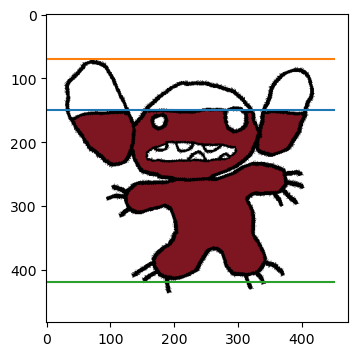

In [60]:
# what % would we get with the thermometer metaphor
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(im_data)
ax.plot([0,450],[150,150]) # where bad starts
ax.plot([0,450],[70,70]) # top of "good" part
ax.plot([0,450], [420,420]) # bottom of toe
plt.show()

In [61]:
goodness_ther = (70-150)/(70-420)
goodness_ther

0.22857142857142856

In [62]:
1.0 - goodness_ther

0.7714285714285715

## RGB Decomposition of images

In [63]:
im_data.shape

(483, 430, 4)

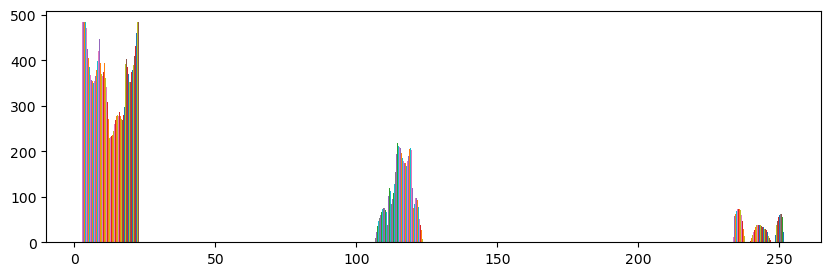

In [65]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0])
plt.show()

In [66]:
im_data[:,:,0].shape

(483, 430)

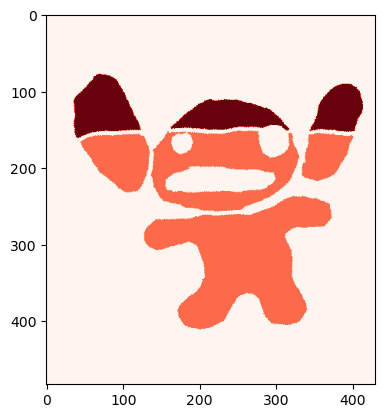

In [68]:
plt.imshow(im_data[:,:,0], cmap='Reds')

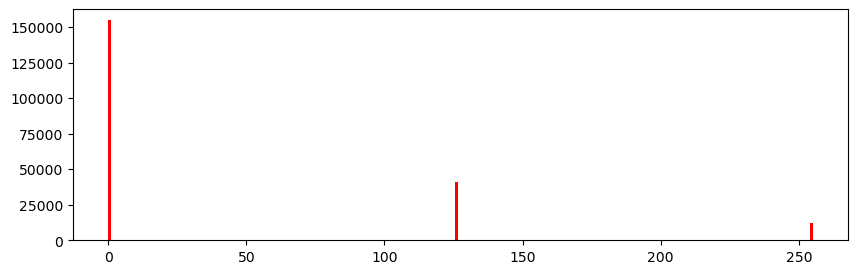

In [71]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(), color='red', bins=256)
plt.show()

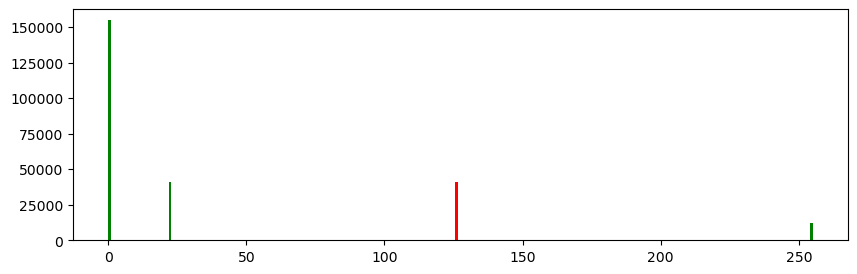

In [74]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(), color='red', bins=256)
ax.hist(im_data[:,:,1].flatten(), color='green', bins=256)
plt.show()

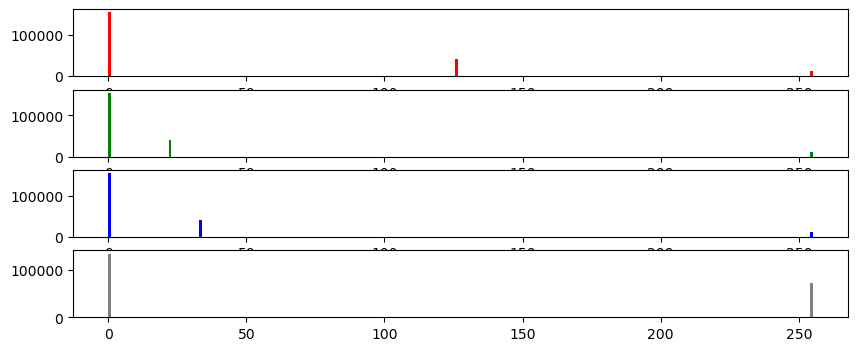

In [78]:
fig, ax = plt.subplots(4,1,figsize=(10,4))
ax[0].hist(im_data[:,:,0].flatten(), color='red', bins=256)
ax[1].hist(im_data[:,:,1].flatten(), color='green', bins=256)
ax[2].hist(im_data[:,:,2].flatten(), color='blue', bins=256)
ax[3].hist(im_data[:,:,3].flatten(), color='gray', bins=256)
plt.show()

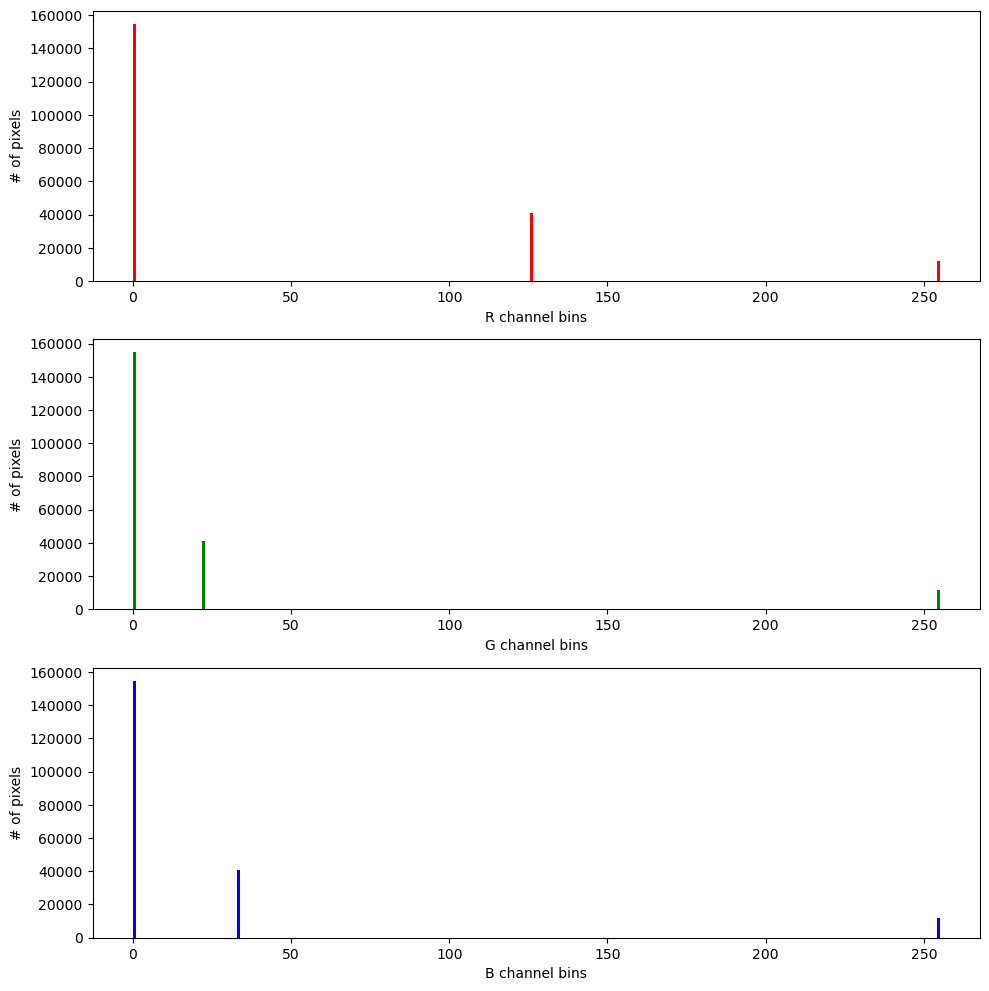

In [90]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].hist(im_data[:,:,0].flatten(), color='red', bins=256)
ax[1].hist(im_data[:,:,1].flatten(), color='green', bins=256)
ax[2].hist(im_data[:,:,2].flatten(), color='blue', bins=256)

ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel('# of pixels')

fig.tight_layout()
plt.show()

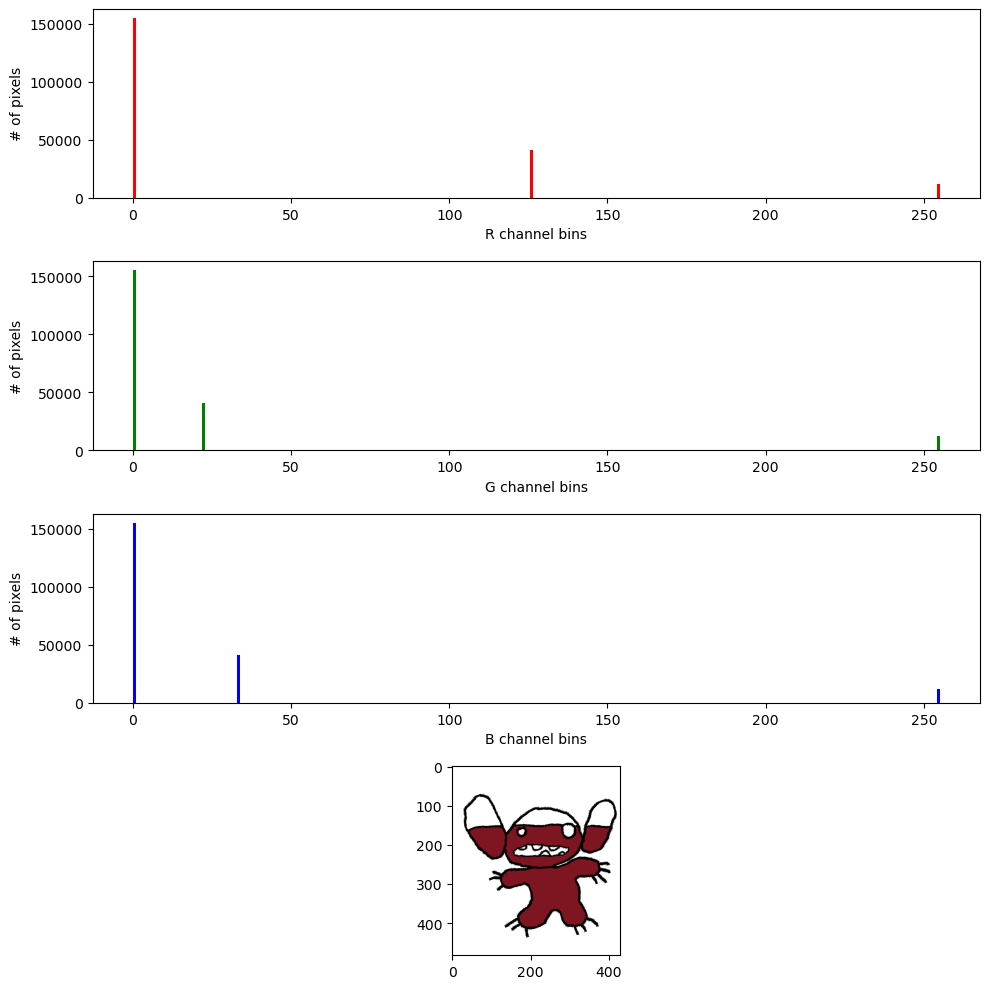

In [91]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].hist(im_data[:,:,0].flatten(), color='red', bins=256)
ax[1].hist(im_data[:,:,1].flatten(), color='green', bins=256)
ax[2].hist(im_data[:,:,2].flatten(), color='blue', bins=256)

ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel('# of pixels')

ax[3].imshow(im_data)

fig.tight_layout()
plt.show()

In [92]:
!wget https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/littleCorgiInHat.png

--2023-08-31 16:28:31--  https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/littleCorgiInHat.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/littleCorgiInHat.png [following]
--2023-08-31 16:28:31--  https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/littleCorgiInHat.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553572 (541K) [image/png]
Saving to: ‘littleCorgiInHat.png.1’

littleCorgiInHat.pn 100%[===================>] 540.60K  --.-KB/s    in 0.04s   

2023-08-31 16:28:31 (11.8 MB/s) - ‘littleCorgiInHat.png.1’ saved [553

In [93]:
im2 = Image.open('littleCorgiInHat.png')

In [94]:
im2_data = np.array(im2)

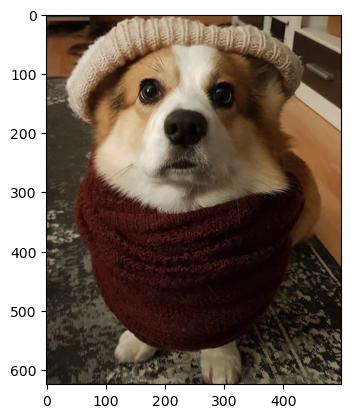

In [95]:
plt.imshow(im2_data)

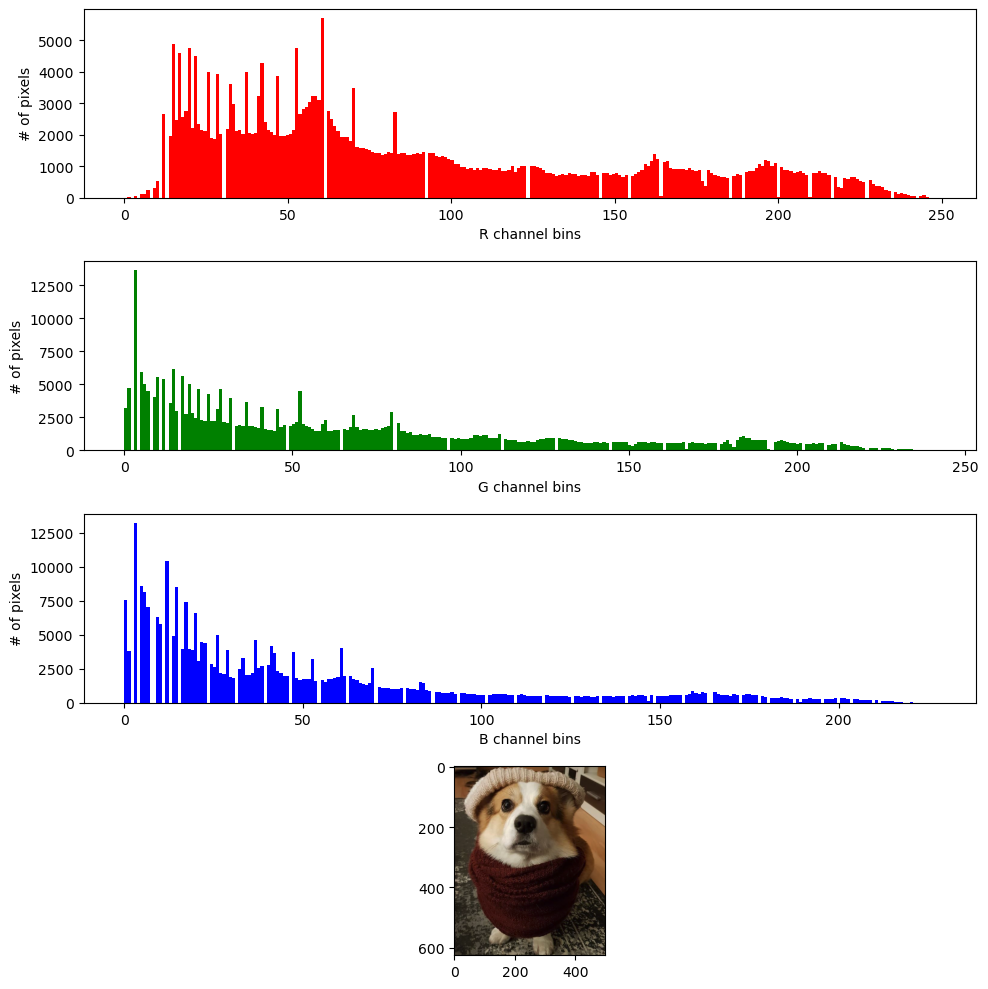

In [96]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].hist(im2_data[:,:,0].flatten(), color='red', bins=256)
ax[1].hist(im2_data[:,:,1].flatten(), color='green', bins=256)
ax[2].hist(im2_data[:,:,2].flatten(), color='blue', bins=256)

ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel('# of pixels')

ax[3].imshow(im2_data)

fig.tight_layout()
plt.show()